In [195]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [196]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [197]:
NUM_CLASSES = 45

# Dataset reading

In [198]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [199]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [201]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [202]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [203]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [204]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 80)                6960      
                                                                 
 dropout_16 (Dropout)        (None, 80)                0         
                                                                 
 dense_33 (Dense)            (None, 100)               8100      
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_34 (Dense)            (None, 50)                5050      
                                                                 
 dense_35 (Dense)            (None, 45)                2295      
                                                                 
Total params: 22405 (87.52 KB)
Trainable params: 22405

In [205]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [206]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [207]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/4500
27/33 [=======================>......] - ETA: 0s - loss: 3.6725 - accuracy: 0.0582   
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 1s 15ms/step - loss: 3.6315 - accuracy: 0.0628 - val_loss: 3.3102 - val_accuracy: 0.0809
Epoch 2/4500
28/33 [========================>.....] - ETA: 0s - loss: 3.2230 - accuracy: 0.1175

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 3.1971 - accuracy: 0.1244 - val_loss: 2.8981 - val_accuracy: 0.1934
Epoch 3/4500
24/33 [====================>.........] - ETA: 0s - loss: 2.8759 - accuracy: 0.1833
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 2.8044 - accuracy: 0.1941 - val_loss: 2.3387 - val_accuracy: 0.3238
Epoch 4/4500
27/33 [=======================>......] - ETA: 0s - loss: 2.3799 - accuracy: 0.2439
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 2.3369 - accuracy: 0.2562 - val_loss: 1.8422 - val_accuracy: 0.4319
Epoch 5/4500
19/33 [================>.............] - ETA: 0s - loss: 2.0326 - accuracy: 0.3170
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [=============

33/33 [==============================] - 0s 8ms/step - loss: 0.4389 - accuracy: 0.8391 - val_loss: 0.2613 - val_accuracy: 0.9234
Epoch 30/4500
26/33 [======================>.......] - ETA: 0s - loss: 0.4154 - accuracy: 0.8534
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.8536 - val_loss: 0.2534 - val_accuracy: 0.9133
Epoch 31/4500
27/33 [=======================>......] - ETA: 0s - loss: 0.4132 - accuracy: 0.8411
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.4133 - accuracy: 0.8450 - val_loss: 0.2555 - val_accuracy: 0.9119
Epoch 32/4500
23/33 [===================>..........] - ETA: 0s - loss: 0.4015 - accuracy: 0.8492
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.4003 - accuracy: 0.8510 - va

Epoch 57/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.2201 - accuracy: 0.9206
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.2272 - accuracy: 0.9167 - val_loss: 0.1333 - val_accuracy: 0.9699
Epoch 58/4500
29/33 [=========================>....] - ETA: 0s - loss: 0.2190 - accuracy: 0.9176
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.2172 - accuracy: 0.9195 - val_loss: 0.1293 - val_accuracy: 0.9628
Epoch 59/4500
23/33 [===================>..........] - ETA: 0s - loss: 0.2128 - accuracy: 0.9293
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.2199 - accuracy: 0.9257 - val_loss: 0.1294 - val_accuracy: 0.9678
Epoch 60/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.2236 - accuracy: 0

17/33 [==============>...............] - ETA: 0s - loss: 0.1637 - accuracy: 0.9439
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 6ms/step - loss: 0.1583 - accuracy: 0.9439 - val_loss: 0.0887 - val_accuracy: 0.9778
Epoch 85/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.1534 - accuracy: 0.9488
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.1486 - accuracy: 0.9499 - val_loss: 0.0948 - val_accuracy: 0.9678
Epoch 86/4500
27/33 [=======================>......] - ETA: 0s - loss: 0.1464 - accuracy: 0.9479
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.1483 - accuracy: 0.9479 - val_loss: 0.0866 - val_accuracy: 0.9828
Epoch 87/4500
23/33 [===================>..........] - ETA: 0s - loss: 0.1537 - accuracy: 0.9487
Epoch 87

25/33 [=====================>........] - ETA: 0s - loss: 0.1088 - accuracy: 0.9663
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.1093 - accuracy: 0.9647 - val_loss: 0.0668 - val_accuracy: 0.9785
Epoch 112/4500
22/33 [===================>..........] - ETA: 0s - loss: 0.1099 - accuracy: 0.9620
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.1129 - accuracy: 0.9616 - val_loss: 0.0553 - val_accuracy: 0.9885
Epoch 113/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.0998 - accuracy: 0.9691
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.1038 - accuracy: 0.9670 - val_loss: 0.0463 - val_accuracy: 0.9900
Epoch 114/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.0965 - accuracy: 0.9647
Ep

Epoch 138/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.0780 - accuracy: 0.9762
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0833 - accuracy: 0.9742 - val_loss: 0.0406 - val_accuracy: 0.9914
Epoch 139/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.0778 - accuracy: 0.9753
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0794 - accuracy: 0.9749 - val_loss: 0.0423 - val_accuracy: 0.9928
Epoch 140/4500
30/33 [==========================>...] - ETA: 0s - loss: 0.0640 - accuracy: 0.9794
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.0338 - val_accuracy: 0.9943
Epoch 141/4500
28/33 [========================>.....] - ETA: 0s - loss: 0.0816 - accu

Epoch 165/4500
33/33 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9821
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0334 - val_accuracy: 0.9957
Epoch 166/4500
22/33 [===================>..........] - ETA: 0s - loss: 0.0559 - accuracy: 0.9851
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.0541 - accuracy: 0.9847 - val_loss: 0.0351 - val_accuracy: 0.9943
Epoch 167/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.0567 - accuracy: 0.9847
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0573 - accuracy: 0.9840 - val_loss: 0.0384 - val_accuracy: 0.9943
Epoch 168/4500
30/33 [==========================>...] - ETA: 0s - loss: 0.0626 - accu

Epoch 192/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.0446 - accuracy: 0.9847
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0488 - accuracy: 0.9830 - val_loss: 0.0307 - val_accuracy: 0.9943
Epoch 193/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.0524 - accuracy: 0.9825
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.0536 - accuracy: 0.9819 - val_loss: 0.0344 - val_accuracy: 0.9936
Epoch 194/4500
27/33 [=======================>......] - ETA: 0s - loss: 0.0423 - accuracy: 0.9870
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0308 - val_accuracy: 0.9950
Epoch 195/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.0458 - accu

Epoch 219/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.0419 - accuracy: 0.9840
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0445 - accuracy: 0.9833 - val_loss: 0.0288 - val_accuracy: 0.9957
Epoch 220/4500
24/33 [====================>.........] - ETA: 0s - loss: 0.0548 - accuracy: 0.9837
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0306 - val_accuracy: 0.9943
Epoch 221/4500
29/33 [=========================>....] - ETA: 0s - loss: 0.0545 - accuracy: 0.9830
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 6ms/step - loss: 0.0546 - accuracy: 0.9826 - val_loss: 0.0247 - val_accuracy: 0.9957
Epoch 222/4500
25/33 [=====================>........] - ETA: 0s - loss: 0.0410 - accu

Epoch 246/4500
26/33 [======================>.......] - ETA: 0s - loss: 0.0446 - accuracy: 0.9862
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0282 - val_accuracy: 0.9957
Epoch 247/4500
27/33 [=======================>......] - ETA: 0s - loss: 0.0384 - accuracy: 0.9893
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0295 - val_accuracy: 0.9957
Epoch 248/4500
23/33 [===================>..........] - ETA: 0s - loss: 0.0376 - accuracy: 0.9895
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 8ms/step - loss: 0.0362 - accuracy: 0.9900 - val_loss: 0.0318 - val_accuracy: 0.9950
Epoch 249/4500
26/33 [======================>.......] - ETA: 0s - loss: 0.0374 - accu

In [208]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9957


In [209]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [210]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 70ms/step
[2.7777540e-09 3.7163575e-13 2.4306916e-13 2.2678431e-19 8.8959694e-13
 1.5392899e-07 1.3107413e-18 4.2645234e-17 2.9543659e-17 9.0459986e-23
 9.4604847e-13 2.2261872e-14 3.2013236e-06 3.0043313e-14 1.9848244e-15
 6.0324541e-12 5.6648475e-27 7.8188664e-09 1.3293881e-14 2.2123709e-18
 3.1197882e-18 2.8008582e-10 5.0214086e-09 1.4443038e-14 5.8222471e-09
 8.7861418e-13 1.3684575e-17 3.4134316e-13 3.6918249e-07 6.2555912e-23
 9.7446524e-08 9.9287182e-01 4.5787962e-10 4.9155548e-14 2.4316567e-20
 8.7550417e-17 8.0799789e-10 6.5156513e-08 1.9500674e-09 1.1855687e-14
 7.1243015e-03 2.0021394e-08 1.9398402e-12 1.7239299e-14 2.3542523e-22]
31


# Confusion matrix

44/44 [==============================] - 0s 2ms/step


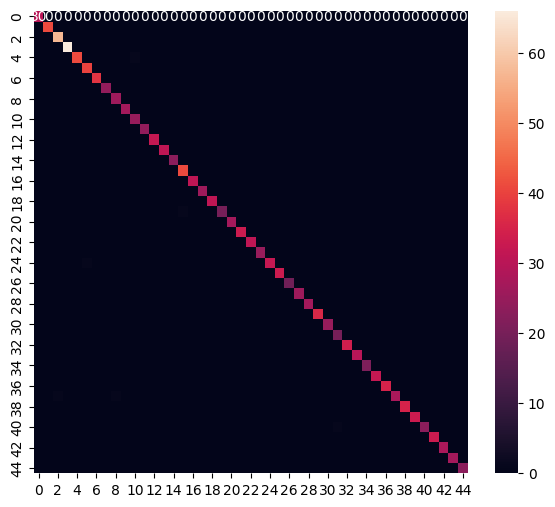

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        41
           2       0.98      1.00      0.99        57
           3       1.00      1.00      1.00        66
           4       1.00      0.98      0.99        42
           5       0.98      1.00      0.99        40
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        24
           8       0.96      1.00      0.98        26
           9       1.00      1.00      1.00        27
          10       0.96      1.00      0.98        25
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        23
          15       0.98      1.00      0.99        41
          16       1.00      1.00      1.00        31
     

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [212]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [213]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp791k7r_3\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp791k7r_3\assets


26016

# Inference test

In [214]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [215]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [216]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [217]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 µs


In [218]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.3558420e-09 4.7800034e-13 2.5337162e-13 3.5604888e-19 9.7254073e-13
 1.9571878e-07 1.3249327e-18 2.6129137e-17 1.9612120e-17 6.2269954e-23
 9.0485453e-13 2.4368452e-14 2.6865755e-06 2.4361665e-14 1.8326746e-15
 7.3344369e-12 6.2294065e-27 1.1169778e-08 1.2679085e-14 1.6309015e-18
 3.0669355e-18 2.8423447e-10 5.4409850e-09 1.5291357e-14 8.0221811e-09
 9.1384409e-13 1.3681128e-17 2.0498398e-13 3.0432338e-07 4.4074896e-23
 7.8057418e-08 9.9068868e-01 3.9749562e-10 2.6912625e-14 1.4838640e-20
 1.0266612e-16 5.1206189e-10 8.2654310e-08 3.8228327e-09 1.8685369e-14
 9.3078744e-03 2.5307525e-08 1.8361202e-12 1.9201258e-14 2.3006721e-22]
31
